## Playoff Performers Project Part 4 - Clustering

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
combined = pd.read_csv("C:/Users/kevin/Downloads/combined 2019-2023 v2.csv")
best_players = pd.read_csv("C:/Users/kevin/Downloads/best players combined 2019-2023 v2.csv")

In [3]:
best_players = pd.get_dummies(best_players,columns=['Pos_x'],drop_first=True)
combined = pd.get_dummies(combined,columns=['Pos_x'],drop_first=True)

### Quick Analysis on Relevant Predictors from Part 3

In [64]:
best_players.corr()['TS%'].sort_values()

C:\Users\kevin\AppData\Local\Temp\ipykernel_20964\3162671976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  best_players.corr()['TS%'].sort_values()


VORP_diff     -0.466848
3PAr_p        -0.288145
3PAr          -0.279633
PER_diff      -0.252066
Pos_x_SG      -0.222703
WS/48_diff    -0.208397
STL%          -0.194879
Pos_x_PG      -0.181184
STL%_p        -0.130703
AST%_p        -0.123547
AST%          -0.064385
TOV%           0.002742
USG%_p         0.007141
Age_x          0.009777
USG%           0.022503
Pos_x_SF       0.023387
TOV%_p         0.025394
G              0.041597
MPG_p          0.054436
MP             0.058105
MPG            0.068632
Pos_x_PF       0.075910
DBPM_p         0.094676
G_p            0.103721
MP_p           0.109957
abs_WS_diff    0.122381
DWS_p          0.161620
BPM_p          0.195736
OBPM_p         0.200567
DWS            0.207844
Year           0.208515
VORP_p         0.219411
WS_p           0.258806
PER_p          0.264617
OWS_p          0.270782
DBPM           0.288835
FTr_p          0.291063
BLK%_p         0.295479
BLK%           0.312316
DRB%_p         0.321802
WS/48_p        0.328839
TS%_p          0

True shooting has a lot of correlation with those all in metrics, which is why higher TS is correlated to lower WS/48 diff.

In [65]:
best_players.corr()['AST%'].sort_values()

C:\Users\kevin\AppData\Local\Temp\ipykernel_20964\583089502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  best_players.corr()['AST%'].sort_values()


VORP_diff     -0.547672
BLK%          -0.270313
Pos_x_SF      -0.244745
ORB%          -0.195693
BLK%_p        -0.172102
Pos_x_PF      -0.142594
TS%_p         -0.137702
3PAr_p        -0.133452
3PAr          -0.133204
ORB%_p        -0.128367
Pos_x_SG      -0.113800
WS/48_diff    -0.073173
TS%           -0.064385
G             -0.062718
PER_diff      -0.028783
TRB%           0.003914
TRB%_p         0.027324
G_p            0.045730
MP_p           0.090949
DRB%           0.091058
Year           0.094301
DRB%_p         0.095026
DWS            0.102550
abs_WS_diff    0.104311
DWS_p          0.124423
MP             0.128188
DBPM_p         0.163557
WS/48_p        0.189402
FTr_p          0.194945
Age_x          0.204153
WS_p           0.218726
OWS_p          0.223176
DBPM           0.242337
STL%_p         0.274646
FTr            0.287139
STL%           0.331727
MPG_p          0.344263
TOV%_p         0.352017
WS/48          0.352307
WS             0.354296
VORP_p         0.384035
OWS            0

Assist percentage correlates a lot with usage and the ballhandler position, which is what I was theorizing about that archetype having higher variance from regular season to playoffs.

In [66]:
best_players.corr()['ORB%'].sort_values()

C:\Users\kevin\AppData\Local\Temp\ipykernel_20964\2475991654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  best_players.corr()['ORB%'].sort_values()


3PAr          -0.669336
3PAr_p        -0.649511
Pos_x_SG      -0.341369
VORP_diff     -0.284541
Pos_x_PG      -0.259756
AST%          -0.195693
MPG_p         -0.187602
AST%_p        -0.171596
PER_diff      -0.167832
WS/48_diff    -0.160305
Pos_x_SF      -0.151410
Age_x         -0.150727
STL%_p        -0.118314
USG%_p        -0.100051
USG%          -0.077679
STL%          -0.027834
MP_p          -0.019196
MPG           -0.018535
Year          -0.004754
G_p            0.001165
OBPM_p         0.026156
VORP_p         0.066802
MP             0.076928
TOV%           0.089133
Pos_x_PF       0.092894
BPM_p          0.093276
G              0.107194
abs_WS_diff    0.108177
OWS_p          0.113303
DWS_p          0.121896
WS_p           0.131407
OBPM           0.135100
TOV%_p         0.140117
TS%_p          0.152633
DBPM_p         0.187060
WS/48_p        0.219536
PER_p          0.228404
VORP           0.267419
BPM            0.273722
OWS            0.333338
FTr_p          0.371951
PER            0

The ORB% has high negative correlation to 3 point attempts and a decently high positive correlation to TS%. You can also assume it's mostly big men here with high ORB%, as evidenced the negative correlation to other positions that aren't center. 

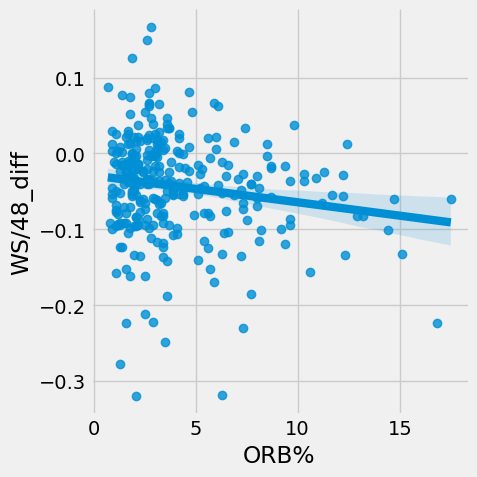

In [67]:
sns.lmplot(x='ORB%', y='WS/48_diff', data=best_players)

As you can see, as ORB% increases, the variance in the WS/48 diff decreases, which supports my thought that low usage big men are less prone to large swings from regular season to postseason. A lot of big men lose minutes in the playoffs because they are hunted on switches, but if they are good enough to still see at least 30 minutes a game, their production is less volatile from regular season to postseason. Players that fit this mold in my mind include guys like Robert Williams and Clint Capela, although even they may not play 30 minutes per game.

### Clustering

In [4]:
threshold = best_players['WS/48_diff'].quantile(0.9)  # Calculate the threshold value at the 90th percentile

top_10_percent = best_players[best_players['WS/48_diff'] >= threshold]  # Filter the DataFrame based on the threshold value

In [5]:
limit = best_players['WS/48_diff'].quantile(0.1)  # Calculate the threshold value at the 90th percentile

bottom_10_percent = best_players[best_players['WS/48_diff'] <= limit]  # Filter the DataFrame based on the threshold value

Created dataframes for the top 10 percentiles of players who raised their game in terms of WS/48 from regular season to postseason and bottom 10 percentiles.

In [21]:
top_10_percent = top_10_percent.set_index('Player')
top_10_percent = top_10_percent.reset_index()

In [19]:
top_10_percent.columns

Index(['Player', 'Age_x', 'Tm_x', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year',
       'SeasonType_x', 'MPG', 'G_p', 'MP_p', 'PER_p', 'TS%_p', '3PAr_p',
       'FTr_p', 'ORB%_p', 'DRB%_p', 'TRB%_p', 'AST%_p', 'STL%_p', 'BLK%_p',
       'TOV%_p', 'USG%_p', 'OWS_p', 'DWS_p', 'WS_p', 'WS/48_p', 'OBPM_p',
       'DBPM_p', 'BPM_p', 'VORP_p', 'SeasonType_y', 'MPG_p', 'PER_diff',
       'VORP_diff', 'WS/48_diff', 'abs_WS_diff', 'Pos_x_PF', 'Pos_x_PG',
       'Pos_x_SF', 'Pos_x_SG'],
      dtype='object')

In [22]:
features = ['Age_x', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
            'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
            'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'Year',
            'MPG',  'Pos_x_PF', 'Pos_x_PG',
            'Pos_x_SF', 'Pos_x_SG']
# WS/48_diff not included because we already filtered out to the 10% based on that.

x = top_10_percent[features].values
x = StandardScaler().fit_transform(x)

In [23]:
len(features)

27

In [24]:
variance_list = []

for n_components in range(2, 28):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(x)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print('For n_components = {}, explained variance ratio is {}'.format(n_components, variance))

For n_components = 2, explained variance ratio is 0.5308802987717227
For n_components = 3, explained variance ratio is 0.6322804588235356
For n_components = 4, explained variance ratio is 0.7149205708070892
For n_components = 5, explained variance ratio is 0.7688995922778147
For n_components = 6, explained variance ratio is 0.8164285344092876
For n_components = 7, explained variance ratio is 0.8513758114485755
For n_components = 8, explained variance ratio is 0.8818060232289479
For n_components = 9, explained variance ratio is 0.9082204433600871
For n_components = 10, explained variance ratio is 0.9303499622851473
For n_components = 11, explained variance ratio is 0.9487441802273011
For n_components = 12, explained variance ratio is 0.9646947705496789
For n_components = 13, explained variance ratio is 0.9762865761242121
For n_components = 14, explained variance ratio is 0.9857464247042478
For n_components = 15, explained variance ratio is 0.9910374228560171
For n_components = 16, expla

In [25]:
pca = PCA(n_components = 10)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = 
                      ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])

pca_df['Player'] = top_10_percent['Player']

In [26]:
pca_df = pca_df[['Player','PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']]

In [27]:
pca_df.head()

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,Anthony Davis,-5.602984,2.910894,-2.026699,-1.573457,0.345255,1.905306,-1.373732,0.259576,-0.014103,-0.760048
1,Anthony Edwards,0.280525,1.011214,3.382568,-1.559874,-1.259119,0.342023,1.365370,-0.356458,-1.745266,-0.705492
2,Caleb Martin,2.278258,1.808798,-1.028200,0.058334,-1.462711,-1.228298,0.678672,-1.371211,-0.794497,1.240796
3,Damian Lillard,-2.599954,-4.134163,1.041197,1.163528,-0.607945,0.600777,-1.861239,-0.098676,0.462149,-0.705444
4,De'Andre Hunter,4.767388,-0.756856,-1.704294,-1.081568,0.226435,-0.354876,0.369789,-0.991800,0.096692,0.156922


In [28]:
print(pca.explained_variance_ratio_)
print(sum((pca.explained_variance_ratio_)))

[0.35612106 0.17475924 0.10140016 0.08264011 0.05397902 0.04752894
 0.03494728 0.03043021 0.02641442 0.02212952]
0.9303499622851473


We ran a principal components analysis (PCA) to shrink the dimensions of the data down to 10 dimensions while still explaining 93% of the variance of the dataset. We then use a dataframe of these components to cluster the players in the top 10 percentile and bottom 10 percentile. The code below aims to find the optimal number of clusters.

In [29]:
x = np.column_stack((pca_df['PC 1'], pca_df['PC 2'], pca_df['PC 3'], pca_df['PC 4'], pca_df['PC 5'],
                    pca_df['PC 6'], pca_df['PC 7'], pca_df['PC 8'], pca_df['PC 9'], pca_df['PC 10']))

silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x)
    
    centers = kmeans.cluster_centers_
    
    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, silhouette score is 0.21739814348833705


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, silhouette score is 0.21260610698221882


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, silhouette score is 0.20293059257321733


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, silhouette score is 0.1794068159550936


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, silhouette score is 0.17887296524165658


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7, silhouette score is 0.17886957775729062


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8, silhouette score is 0.19444553049572982


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9, silhouette score is 0.18814235002677507


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 10, silhouette score is 0.19321819673228416


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 11, silhouette score is 0.1875862010906865


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 12, silhouette score is 0.20846802661623753


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 13, silhouette score is 0.1685176157603538


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 14, silhouette score is 0.1895522291474249


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 15, silhouette score is 0.1614444541651759


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 16, silhouette score is 0.18480119116559954


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 17, silhouette score is 0.17254812989439755


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 18, silhouette score is 0.17896575559949127


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 19, silhouette score is 0.1736816756068145


For picking clusters, 4 clusters or 12 are good options to check out.

Text(0.5, 0.98, 'Identifying Optimal Cluster #')

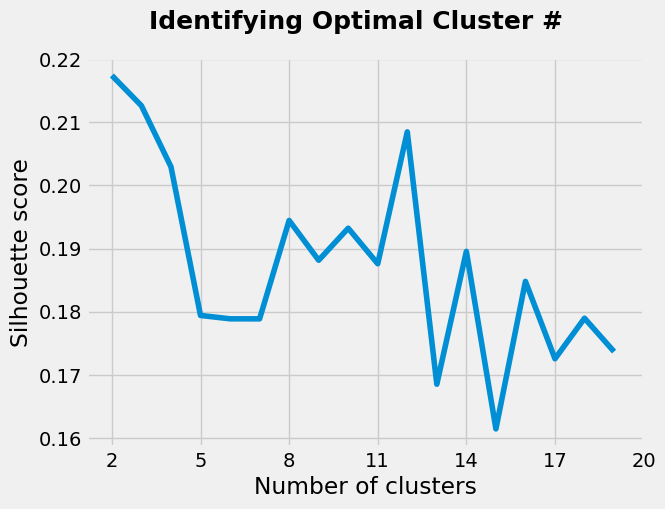

In [30]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,20), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2,21, 3.0))

silhouette_fig.suptitle('Identifying Optimal Cluster #', weight = 'bold', size = 18)

In [59]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = top_10_percent['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster.sort_values(by='Cluster')

,Player,Cluster
14,Jaylen Brown,0
27,Rui Hachimura,0
2,Caleb Martin,0
22,Mike Conley,0
4,De'Andre Hunter,0
7,Dillon Brooks,0
9,Eric Gordon,0
28,Seth Curry,0
20,LeBron James,1
19,LeBron James,1


Looks like this clustered by play style/position when we do 4 clusters. Let's try 12 clusters.

In [31]:
kmeans = KMeans(n_clusters = 12, random_state = 1)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = top_10_percent['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster.sort_values(by='Cluster')

,Player,Cluster
22,Mike Conley,0
12,Jamal Murray,0
11,Jamal Murray,0
17,Kawhi Leonard,1
16,Kawhi Leonard,1
15,Jimmy Butler,1
29,Stephen Curry,2
20,LeBron James,2
19,LeBron James,2
13,James Harden,2


This is insightful. Category 11 with Seth Curry can be seen as an exception. Some of the categories that stand out to me which contrast with the groups analysis you will see later from the worst 10 percent is category 9: which is floor spacing big men with paint protection and categories 6 and 7: wings with good size and can defend. Overall, the main theme is versatility. Big men that can shoot can raise their game, perimeter players that can defend remain strong contributors.

***Doing the same now on the bottom 10 percentile. (Guys whose games fell off most from regular to post season)***

In [6]:
bottom_10_percent = bottom_10_percent.set_index('Player')
bottom_10_percent = bottom_10_percent.reset_index()

In [7]:
features = ['Age_x', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
            'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
            'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'Year',
            'MPG',  'Pos_x_PF', 'Pos_x_PG',
            'Pos_x_SF', 'Pos_x_SG']
# WS/48_diff not included because we already filtered out to the 10% based on that.

x = bottom_10_percent[features].values
x = StandardScaler().fit_transform(x)

In [8]:
variance_list = []

for n_components in range(2, 28):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(x)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print('For n_components = {}, explained variance ratio is {}'.format(n_components, variance))

For n_components = 2, explained variance ratio is 0.5263284931249472
For n_components = 3, explained variance ratio is 0.621928890538312
For n_components = 4, explained variance ratio is 0.6996410481662296
For n_components = 5, explained variance ratio is 0.7666094577989258
For n_components = 6, explained variance ratio is 0.8253268991223309
For n_components = 7, explained variance ratio is 0.8627778017368924
For n_components = 8, explained variance ratio is 0.8945797691088728
For n_components = 9, explained variance ratio is 0.9213766255348013
For n_components = 10, explained variance ratio is 0.9410851041054012
For n_components = 11, explained variance ratio is 0.9544389436732774
For n_components = 12, explained variance ratio is 0.9669972261526003
For n_components = 13, explained variance ratio is 0.9767111804644386
For n_components = 14, explained variance ratio is 0.9837579542116038
For n_components = 15, explained variance ratio is 0.9895986565750174
For n_components = 16, explai

In [9]:
pca = PCA(n_components = 10)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = 
                      ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])

pca_df['Player'] = bottom_10_percent['Player']

In [10]:
pca_df = pca_df[['Player','PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']]

In [11]:
pca_df.head()

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,Andre Drummond,-3.408309,-4.135380,3.445033,1.704694,0.862320,-0.229749,-0.754592,-1.116496,1.495905,0.090629
1,Bam Adebayo,-2.811155,-1.368660,0.587289,0.611461,0.542684,1.287299,-0.008645,0.713674,-1.146263,0.120704
2,Bradley Beal,1.042587,1.636921,0.633212,0.088060,-0.191965,-1.057626,-0.399845,2.264114,0.506179,0.628725
3,CJ McCollum,2.897845,1.416617,-0.854065,0.071443,-0.634545,-1.787039,-1.560013,1.628939,0.313048,0.490043
4,D'Angelo Russell,2.410066,2.130429,0.836669,-0.524206,0.260040,2.440931,-0.355586,-0.185936,0.275948,-0.490515


In [12]:
print(pca.explained_variance_ratio_)
print(sum((pca.explained_variance_ratio_)))

[0.36538689 0.16094161 0.0956004  0.07771216 0.06696841 0.05871744
 0.0374509  0.03180197 0.02679686 0.01970848]
0.9410851041054012


In [13]:
x = np.column_stack((pca_df['PC 1'], pca_df['PC 2'], pca_df['PC 3'], pca_df['PC 4'], pca_df['PC 5'],
                    pca_df['PC 6'], pca_df['PC 7'], pca_df['PC 8'], pca_df['PC 9'], pca_df['PC 10']))

silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x)
    
    centers = kmeans.cluster_centers_
    
    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, silhouette score is 0.20942474267227967


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, silhouette score is 0.18377018622362343


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, silhouette score is 0.15908780237356737


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, silhouette score is 0.15971612786533487


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, silhouette score is 0.1846732855099197


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7, silhouette score is 0.16840411346373382


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8, silhouette score is 0.21940711086584527


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9, silhouette score is 0.23221767845552665


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 10, silhouette score is 0.2514061107179692


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 11, silhouette score is 0.24983222858315254


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 12, silhouette score is 0.27967735646110725


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 13, silhouette score is 0.2489296259008563


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 14, silhouette score is 0.26256458388512244


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 15, silhouette score is 0.29602329102324093


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 16, silhouette score is 0.27813862234181835


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 17, silhouette score is 0.26333442090754916


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 18, silhouette score is 0.24889096843147013


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 19, silhouette score is 0.24634729874748199


Text(0.5, 0.98, 'Identifying Optimal Cluster #')

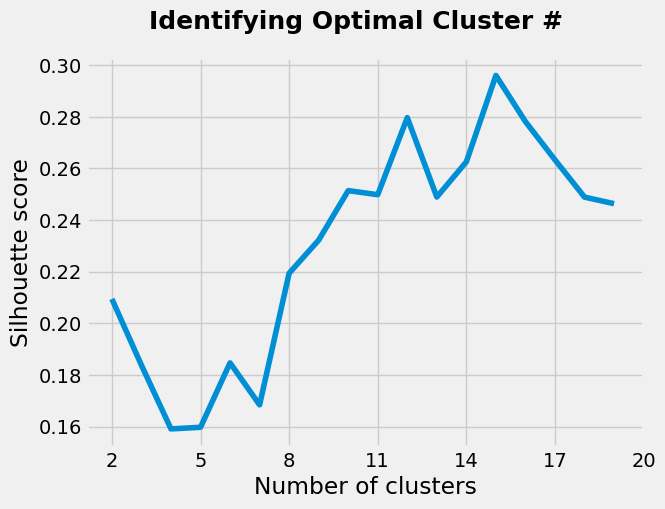

In [14]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,20), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2,21, 3.0))

silhouette_fig.suptitle('Identifying Optimal Cluster #', weight = 'bold', size = 18)

We will try 8 and 12 clusters. 15 clusters has high silhouette score but with the data sample size of the bottom 10 percent (31 people), each cluster would be like 2 people.

In [16]:
kmeans = KMeans(n_clusters = 8, random_state = 1)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = bottom_10_percent['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster.sort_values(by='Cluster')

,Player,Cluster
0,Andre Drummond,0
14,Jarrett Allen,0
13,Giannis Antetokounmpo,0
17,Joel Embiid,0
18,Jonas Valančiūnas,0
9,Domantas Sabonis,0
16,Joel Embiid,0
1,Bam Adebayo,0
21,Karl-Anthony Towns,1
4,D'Angelo Russell,1


What's interesting to me here is that category 0 is big men, mostly guys who are effective but not strong floor spacers. The rest of the tiers are variations of perimeter players who are mainly offense first. These guys are known as strong scorers/offensive value adds but can be thought of as defensive liabilities.

In [19]:
kmeans = KMeans(n_clusters = 12, random_state = 1)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = bottom_10_percent['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster.sort_values(by='Cluster')

,Player,Cluster
9,Domantas Sabonis,0
1,Bam Adebayo,0
14,Jarrett Allen,0
18,Jonas Valančiūnas,0
2,Bradley Beal,1
3,CJ McCollum,1
5,Damian Lillard,2
29,Trae Young,2
20,Julius Randle,3
23,Kevin Durant,3


This is a strong look as well. With more clusters, we can treat category 7 of Embiid and Giannis as superstar exceptions and everything else would fit the description in the previous text.

In [33]:
top_10_percent.to_csv('C:/Users/kevin/Downloads/top 10% outperformers.csv', index=False)
bottom_10_percent.to_csv('C:/Users/kevin/Downloads/bottom 10% outperformers.csv', index=False)